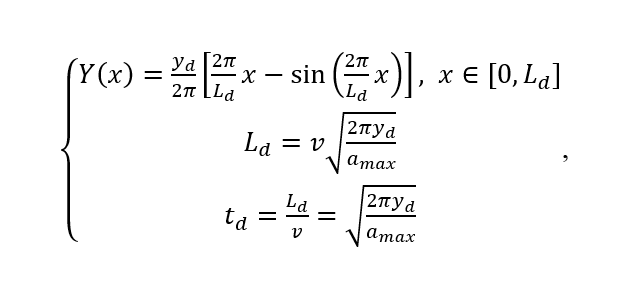

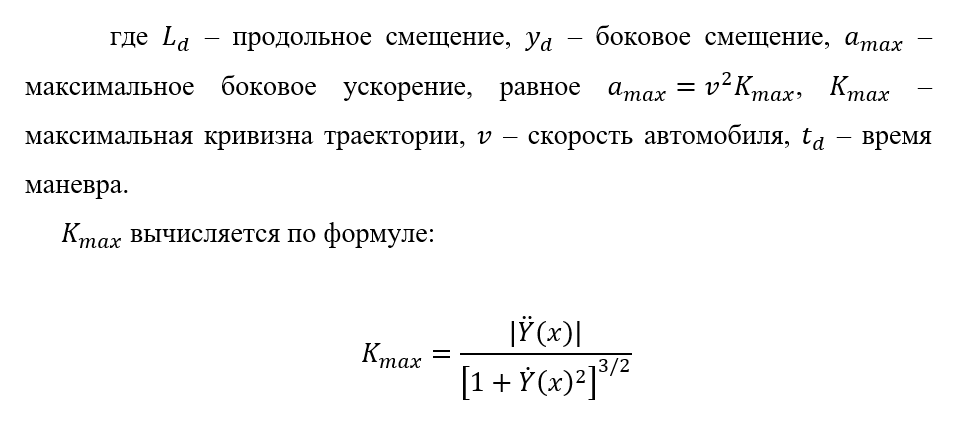

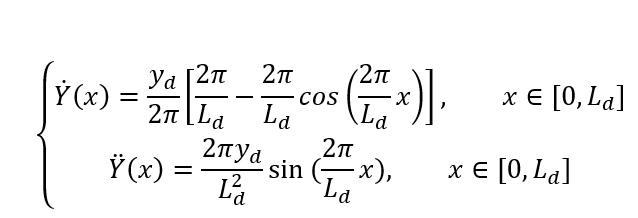

In [9]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [31]:
v = 2
yd = 3.75
Ld = 30
def path_planer(v, yd=3.75, Ld=30):
    # Ld = v * math.sqrt((2 * math.pi * yd) / a_max)
    x = np.arange(0, Ld, 1)
    Y = yd/(2*math.pi) * (2*math.pi*x/Ld - np.sin(2*math.pi*x/Ld))
    # Y1 = (0.5 * yd / math.pi) * (2*math.pi/Ld - (2*math.pi/Ld)*math.cos(2*math.pi*x/Ld))
    # Y2 = (2*math.pi*yd/Ld ** 2) * math.sin(2*math.pi*x/Ld)
    td = Ld / v
    # K_max = abs(Y2)/pow((1 + Y1 ** 2), 3/2)
    # a_max = K_max * v ** 2
    return x, Y, td

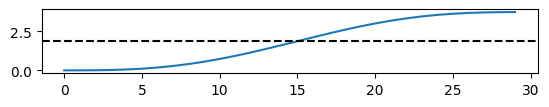

In [32]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
Y, t = path_planer(v)
x = np.arange(0, Ld, 1)
plt.plot(x, Y)
plt.axhline(yd/2, color='black', linestyle='--')

In [40]:
t

15.0

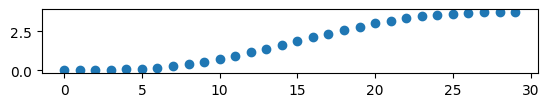

In [33]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(x,Y)

In [1]:
def angle_to_control(angle_degrees):
    '''convert angle (deg) to control signal ([-1;1])'''
    max_angle_degrees = 65
    control_signal = angle_degrees / max_angle_degrees
    return control_signal

In [10]:
def get_point_angle(x, y):
    '''calculate angle b/w vector (x,y) and horizontal line'''
    angle_rad = np.arctan2(y, x)
    angle_deg = np.degrees(angle_rad)
    # if angle_deg < 0:
    #     angle_deg += 360
    return angle_deg


In [42]:
def get_path_angles(x, y):
    '''calculate angles along path'''
    angles = []
    for i in range(1, len(x)):
        angles.append(get_point_angle(x[i] - x[i-1], y[i] - y[i-1]))
    return angles

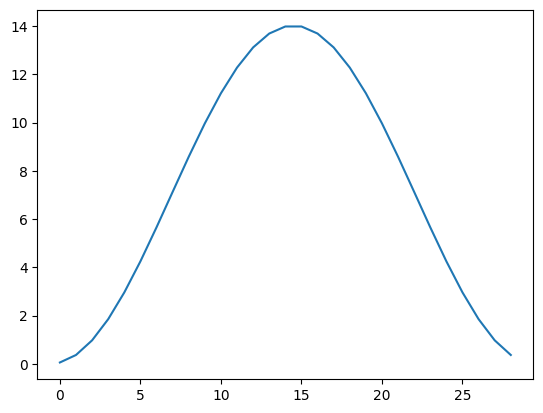

In [35]:
plt.plot(angles)

In [41]:
dt = 15/len(x)
dt

0.5

In [ ]:
def maneuver():
    '''implementation of lane changing'''
    v = 2
    yd = 3.75
    Ld = 30
    X, Y, t = path_planer(v, yd, Ld)
    angles = get_path_angles(X, Y)
    dt = t / len(X)
    for i in range(len(X)):
        steer(car, angles[i])
        time.sleep(dt)

def steer(car, angle):
    car.steering(angle_to_control(angle))
    